# Deep Learning for simulating ODE(Laplace equation)

$\nabla^2 \phi (x,y) = \frac{\partial^2 \phi}{\partial x^2} + \frac{\partial^2 \phi}{\partial y^2}=0, 
\forall x \in D.
$ 

With following BCs:

$\phi (x,y)=0,\forall x \in $\{$(x,y)\in D|x=0,x=1,$ or $y=0$\}

$\phi (x,y)=sin\pi x, \forall x \in $\{$(x,y)\in D|y=1$}
## Load all the libaray

In [46]:
'''
keras mlp regression
'''
from __future__ import print_function

import numpy as np

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
%matplotlib inline

## Generate data sample from the analitical solution

generate data from analytic solution


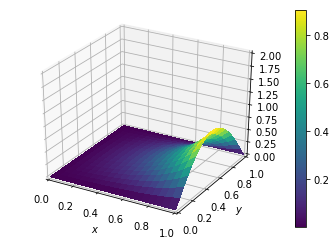

In [47]:
nx = 20
ny = 20

x_space = np.linspace(0, 1, nx)
y_space = np.linspace(0, 1, ny)


def analytic_solution(x):
    return (1 / (np.exp(np.pi) - np.exp(-np.pi))) * \
           np.sin(np.pi * x[0]) * (np.exp(np.pi * x[1]) - np.exp(-np.pi * x[1]))


x_input = np.zeros((ny,nx,2))

surface = np.zeros((ny, nx))
for i, x in enumerate(x_space):
    for j, y in enumerate(y_space):
        surface[i][j] = analytic_solution([x, y])
        x_input[i][j] = [x, y]


x_input = x_input.reshape(-1, x_input.shape[-1])
y_anal = surface.reshape(-1,1)

print('generate data from analytic solution')
###
fig = plt.figure()
ax = fig.gca(projection='3d')
X, Y = np.meshgrid(x_space, y_space)
surf = ax.plot_surface(X, Y, surface, rstride=1, cstride=1, cmap=cm.viridis,
        linewidth=0, antialiased=False)

ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.set_zlim(0, 2)

ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
plt.colorbar(surf)


## Build a MLP emulator
### 3 hidden Layes MLP
20 X 400 X 20

In [48]:
batch_size = 32
epochs = 400
vsplit = 0.

print('Building model...')
model = Sequential()
model.add(Dense(20, input_shape=(2,)))
model.add(Activation('relu'))
model.add(Dropout(0.))
model.add(Dense(400))
model.add(Activation('relu'))
model.add(Dropout(0.))
model.add(Dense(20))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(Dense(1))
#model.add(Activation('linear'))



model.compile(loss='mse',
              optimizer='adam',
              metrics=['accuracy'])

history = model.fit(x_input, y_anal,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_split=vsplit)
# score = model.evaluate(x_test, y_test,
#                        batch_size=batch_size, verbose=1)
# print('Test score:', score[0])
# print('Test accuracy:', score[1])


Building model...
Epoch 1/400
400/400 [==============================] - 0s - loss: 0.0356 - acc: 0.0975     
Epoch 2/400
400/400 [==============================] - 0s - loss: 0.0236 - acc: 0.0975     
Epoch 3/400
400/400 [==============================] - 0s - loss: 0.0190 - acc: 0.0975     
Epoch 4/400
400/400 [==============================] - 0s - loss: 0.0143 - acc: 0.0975     
Epoch 5/400
400/400 [==============================] - 0s - loss: 0.0133 - acc: 0.0975     
Epoch 6/400
400/400 [==============================] - 0s - loss: 0.0110 - acc: 0.0975     
Epoch 7/400
400/400 [==============================] - 0s - loss: 0.0093 - acc: 0.0975     
Epoch 8/400
400/400 [==============================] - 0s - loss: 0.0086 - acc: 0.0975     
Epoch 9/400
400/400 [==============================] - 0s - loss: 0.0076 - acc: 0.0975     
Epoch 10/400
400/400 [==============================] - 0s - loss: 0.0072 - acc: 0.0975     
Epoch 11/400
400/400 [==============================] - 0s - 

400/400 [==============================] - 0s - loss: 0.0021 - acc: 0.0975     
Epoch 89/400
400/400 [==============================] - 0s - loss: 0.0022 - acc: 0.0975     
Epoch 90/400
400/400 [==============================] - 0s - loss: 0.0020 - acc: 0.0975     
Epoch 91/400
400/400 [==============================] - 0s - loss: 0.0022 - acc: 0.0975     
Epoch 92/400
400/400 [==============================] - 0s - loss: 0.0029 - acc: 0.0975     
Epoch 93/400
400/400 [==============================] - 0s - loss: 0.0023 - acc: 0.0975     
Epoch 94/400
400/400 [==============================] - 0s - loss: 0.0022 - acc: 0.0975     
Epoch 95/400
400/400 [==============================] - 0s - loss: 0.0027 - acc: 0.0975         
Epoch 96/400
400/400 [==============================] - 0s - loss: 0.0023 - acc: 0.0975     
Epoch 97/400
400/400 [==============================] - 0s - loss: 0.0022 - acc: 0.0975     
Epoch 98/400
400/400 [==============================] - 0s - loss: 0.0020 - acc

400/400 [==============================] - 0s - loss: 0.0023 - acc: 0.0975     
Epoch 175/400
400/400 [==============================] - 0s - loss: 0.0016 - acc: 0.0975     
Epoch 176/400
400/400 [==============================] - 0s - loss: 0.0018 - acc: 0.0975     
Epoch 177/400
400/400 [==============================] - 0s - loss: 0.0019 - acc: 0.0975     
Epoch 178/400
400/400 [==============================] - 0s - loss: 0.0020 - acc: 0.0975     
Epoch 179/400
400/400 [==============================] - 0s - loss: 0.0018 - acc: 0.0975     
Epoch 180/400
400/400 [==============================] - 0s - loss: 0.0017 - acc: 0.0975     
Epoch 181/400
400/400 [==============================] - 0s - loss: 0.0026 - acc: 0.0975     
Epoch 182/400
400/400 [==============================] - 0s - loss: 0.0018 - acc: 0.0975     
Epoch 183/400
400/400 [==============================] - 0s - loss: 0.0016 - acc: 0.0975     
Epoch 184/400
400/400 [==============================] - 0s - loss: 0.0014

400/400 [==============================] - 0s - loss: 0.0018 - acc: 0.0975     
Epoch 261/400
400/400 [==============================] - 0s - loss: 0.0017 - acc: 0.0975     
Epoch 262/400
400/400 [==============================] - 0s - loss: 0.0019 - acc: 0.0975         
Epoch 263/400
400/400 [==============================] - 0s - loss: 0.0020 - acc: 0.0975     
Epoch 264/400
400/400 [==============================] - 0s - loss: 0.0017 - acc: 0.0975     
Epoch 265/400
400/400 [==============================] - 0s - loss: 0.0018 - acc: 0.0975     
Epoch 266/400
400/400 [==============================] - 0s - loss: 0.0020 - acc: 0.0975     
Epoch 267/400
400/400 [==============================] - ETA: 0s - loss: 9.6368e-04 - acc: 0.031 - 0s - loss: 0.0013 - acc: 0.0975         
Epoch 268/400
400/400 [==============================] - 0s - loss: 0.0022 - acc: 0.0975         
Epoch 269/400
400/400 [==============================] - 0s - loss: 0.0020 - acc: 0.0975     
Epoch 270/400
400/40

400/400 [==============================] - 0s - loss: 0.0023 - acc: 0.0975     
Epoch 346/400
400/400 [==============================] - 0s - loss: 0.0019 - acc: 0.0975     
Epoch 347/400
400/400 [==============================] - 0s - loss: 0.0017 - acc: 0.0975     
Epoch 348/400
400/400 [==============================] - 0s - loss: 0.0020 - acc: 0.0975     
Epoch 349/400
400/400 [==============================] - 0s - loss: 0.0021 - acc: 0.0975     
Epoch 350/400
400/400 [==============================] - 0s - loss: 0.0024 - acc: 0.0975     
Epoch 351/400
400/400 [==============================] - 0s - loss: 0.0018 - acc: 0.0975     
Epoch 352/400
400/400 [==============================] - 0s - loss: 0.0016 - acc: 0.0975     
Epoch 353/400
400/400 [==============================] - 0s - loss: 0.0018 - acc: 0.0975     
Epoch 354/400
400/400 [==============================] - 0s - loss: 0.0023 - acc: 0.0975     
Epoch 355/400
400/400 [==============================] - 0s - loss: 0.0021

## Learning Curves

In [49]:
if(bool(vsplit)):
    # summarize history for accuracy
    fig = plt.figure()
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

    # summarize history for loss
    fig = plt.figure()
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()


## ML inferencing

In [50]:
x_test = x_input+0.0
x_test_space=x_test.reshape(ny,nx,2)[0,:,1]
y_test_space=x_test.reshape(ny,nx,2)[:,0,0]
surface_predict = model.predict(x_test).reshape(ny, nx)


## compare to analitical solution

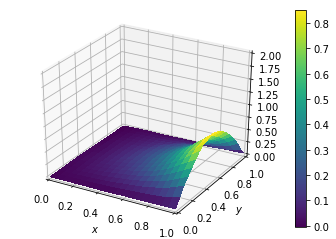

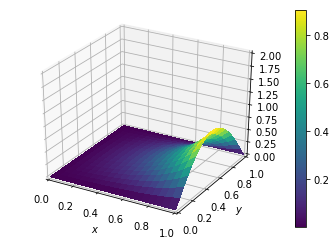

In [51]:
###
fig = plt.figure()
ax = fig.gca(projection='3d')
X, Y = np.meshgrid(x_test_space, y_test_space)
surf_pdt = ax.plot_surface(X, Y, surface_predict, rstride=1, cstride=1, cmap=cm.viridis,
        linewidth=0, antialiased=False)

ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.set_zlim(0, 2)

ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
plt.colorbar(surf_pdt)

fig = plt.figure()
ax = fig.gca(projection='3d')
X, Y = np.meshgrid(x_space, y_space)
surf = ax.plot_surface(X, Y, surface, rstride=1, cstride=1, cmap=cm.viridis,
        linewidth=0, antialiased=False)

ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.set_zlim(0, 2)

ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
plt.colorbar(surf)

### *top* is the ML estimation; *bottom* is analitical solution